In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


In [2]:
data = np.load('/content/cluster_data.npy')

In [3]:
data


array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

In [ ]:
len(data)

2309

In [ ]:
data.dtype

dtype('float64')

In [ ]:
data.ndim

2

In [ ]:
data.size

4618

In [ ]:
np.isnan(data).sum()

0

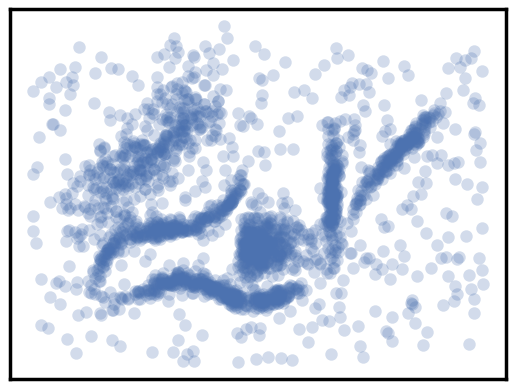

In [4]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)


In [5]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.9, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)


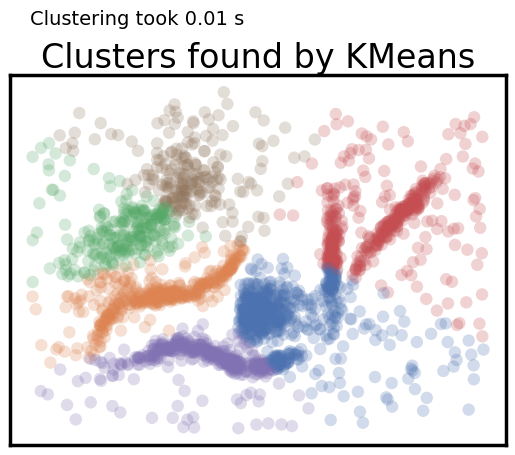

In [ ]:
# K means clustring
plot_clusters(data, cluster.KMeans,(),{'n_clusters':6,'init':'k-means++', 'n_init':'auto', 'max_iter':300,
                                       'tol':0.0001,'random_state':42,'algorithm':'lloyd'})

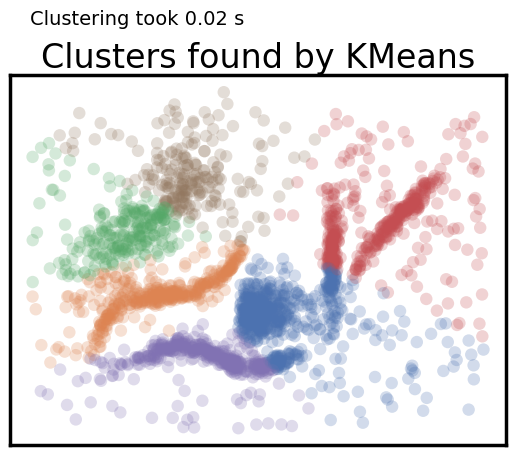

In [ ]:
# K means clustring
plot_clusters(data, cluster.KMeans,(),{'n_clusters':6,'init':'k-means++', 'n_init':1, 'max_iter':300,
                                       'tol':0.0001,'random_state':42,'algorithm':'lloyd'})

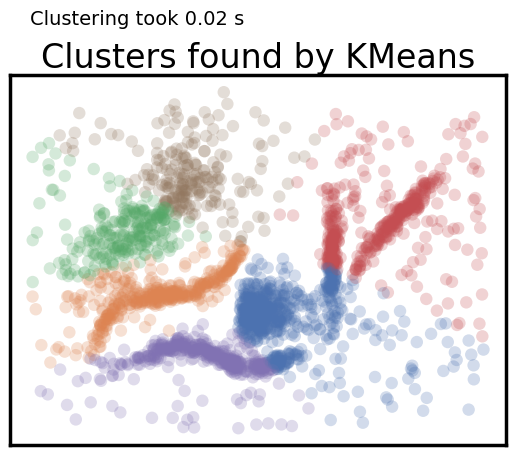

In [ ]:
# K means clustring
plot_clusters(data, cluster.KMeans,(),{'n_clusters':6,'init':'k-means++', 'n_init':1, 'max_iter':300,
                                       'tol':0.0001,'random_state':42,'algorithm':'elkan'})

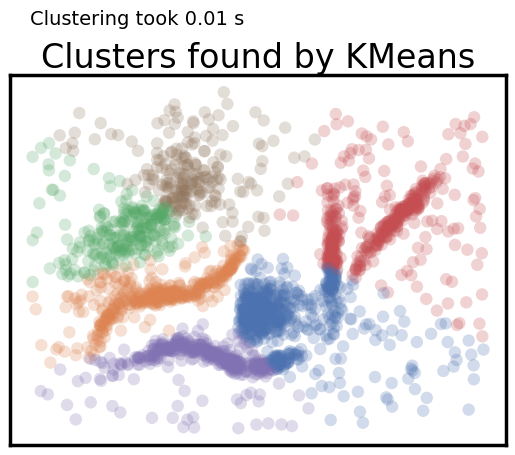

In [ ]:
# K means clustring
plot_clusters(data, cluster.KMeans,(),{'n_clusters':6,'init':'k-means++', 'n_init':'auto', 'max_iter':300,
                                       'tol':0.0001,'random_state':42,'algorithm':'elkan'})

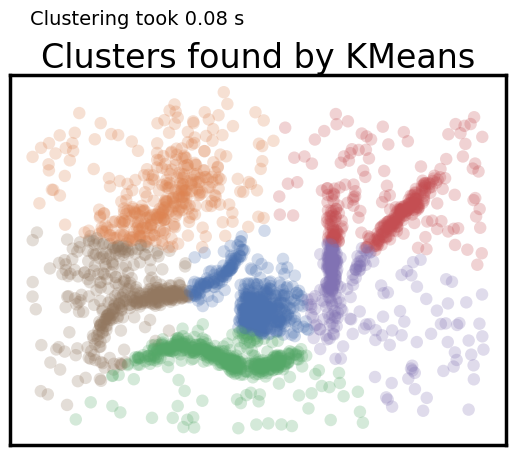

In [ ]:
# K means clustring
plot_clusters(data, cluster.KMeans,(),{'n_clusters':6,'init':'random', 'n_init':'auto', 'max_iter':300,
                                       'tol':0.0001, 'random_state':42,'algorithm':'lloyd'})

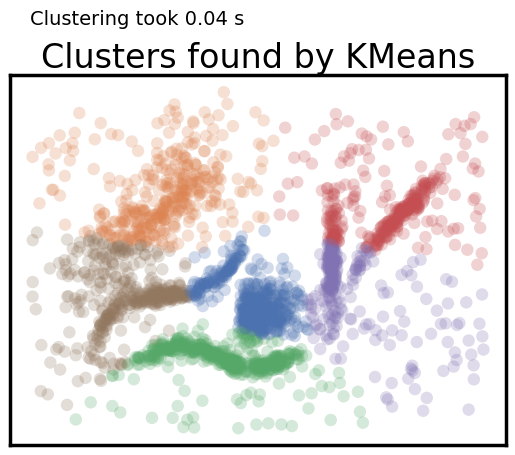

In [ ]:
# K means clustring
plot_clusters(data, cluster.KMeans,(),{'n_clusters':6,'init':'random', 'n_init':10, 'max_iter':300,
                                       'tol':0.0001, 'random_state':42,'algorithm':'lloyd'})

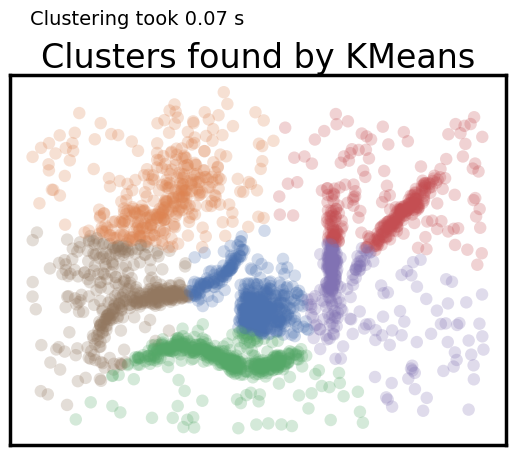

In [ ]:
# K means clustring
plot_clusters(data, cluster.KMeans,(),{'n_clusters':6,'init':'random', 'n_init':10, 'max_iter':300,
                                       'tol':0.0001, 'random_state':42,'algorithm':'elkan'})

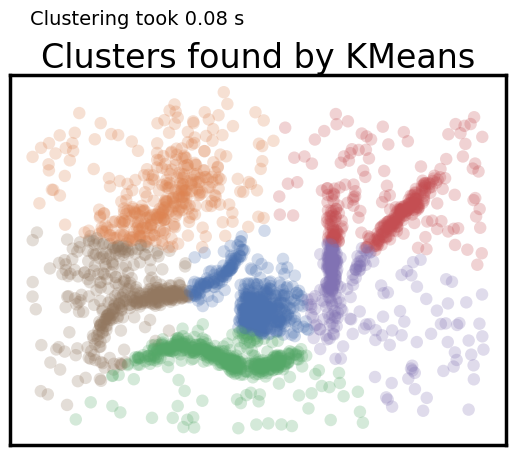

In [ ]:
# K means clustring
plot_clusters(data, cluster.KMeans,(),{'n_clusters':6,'init':'random', 'n_init':'auto', 'max_iter':300,
                                       'tol':0.0001, 'random_state':42,'algorithm':'elkan'})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


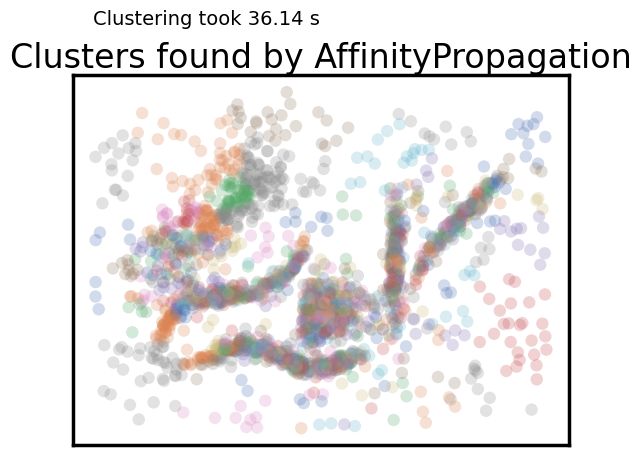

In [ ]:
# Affinity Propagation
plot_clusters(data, cluster.AffinityPropagation,(),{'preference':-6, 'damping':0.5, 'max_iter':300, 'convergence_iter':15,
                                                    'affinity':'euclidean','random_state':42})

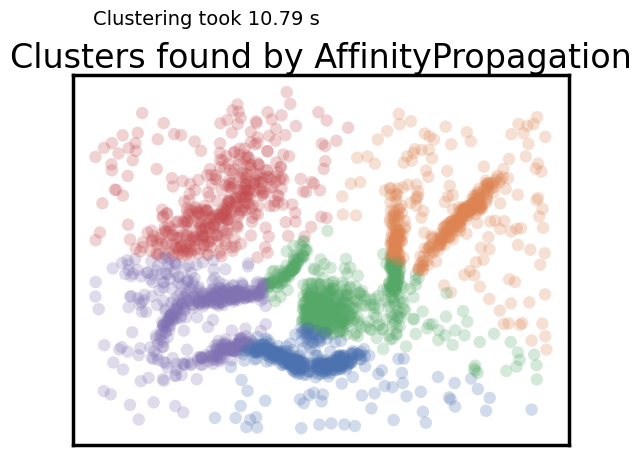

In [ ]:
# Affinity Propagation
plot_clusters(data, cluster.AffinityPropagation,(),{'preference':-6, 'damping':0.95,  'max_iter':300, 'convergence_iter':15,
                                                    'affinity':'euclidean','random_state':42})

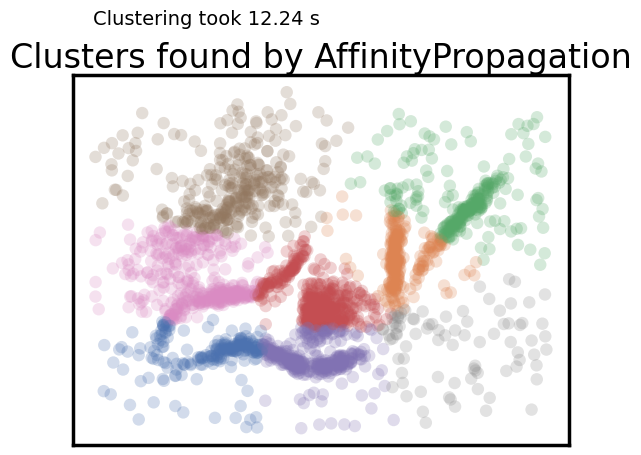

In [ ]:
# Affinity Propagation
plot_clusters(data, cluster.AffinityPropagation,(),{'preference':-5, 'damping':0.95,  'max_iter':300, 'convergence_iter':15,
                                                    'affinity':'euclidean','random_state':42})

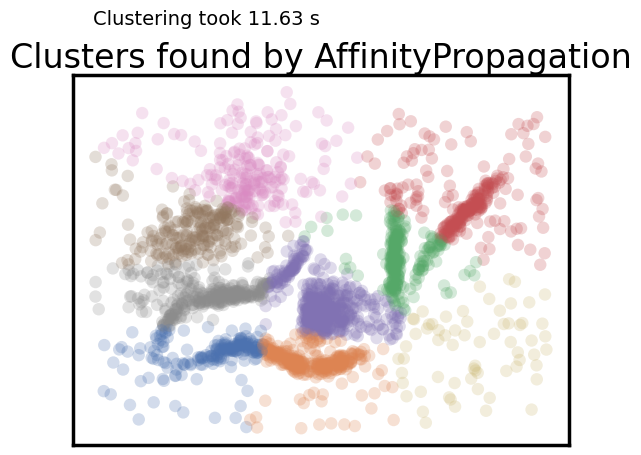

In [ ]:
# Affinity Propagation
plot_clusters(data, cluster.AffinityPropagation,(),{'preference':-4, 'damping':0.95,  'max_iter':300, 'convergence_iter':15,
                                                    'affinity':'euclidean','random_state':42})

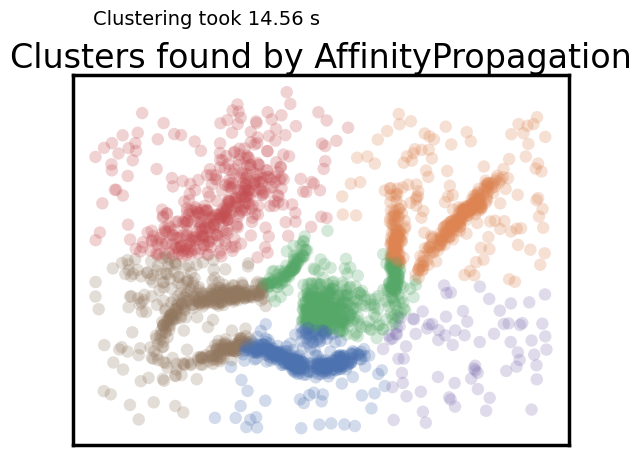

In [ ]:
# Affinity Propagation
plot_clusters(data, cluster.AffinityPropagation,(),{'preference':-6, 'damping':0.95,  'max_iter':300, 'convergence_iter':25,
                                                    'affinity':'euclidean','random_state':42})

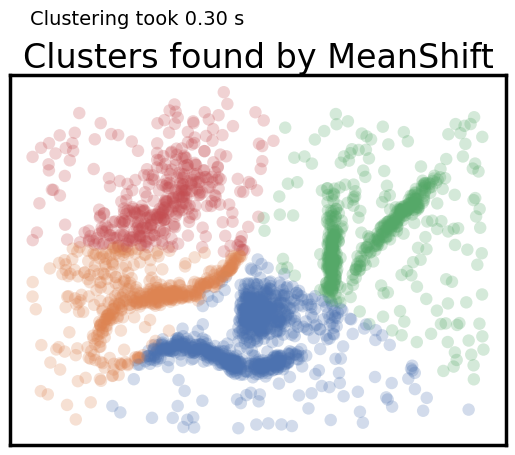

In [ ]:
# Mean shift
plot_clusters(data, cluster.MeanShift,(),kwds={ 'bandwidth':0.2, 'bin_seeding':True,
                                               'n_jobs':1, 'max_iter':300, 'cluster_all':True})

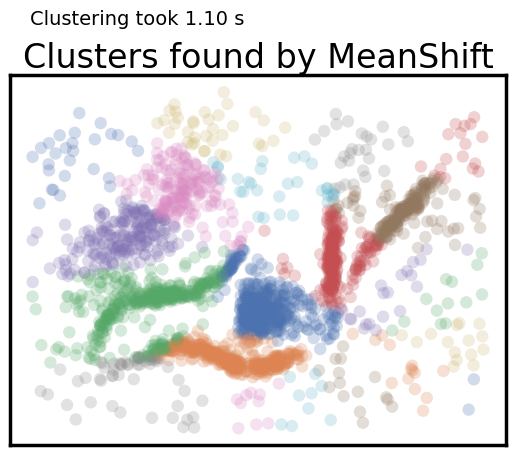

In [ ]:
# Mean shift
plot_clusters(data, cluster.MeanShift,(),kwds={ 'bandwidth':0.1, 'bin_seeding':True,
                                               'n_jobs':1, 'max_iter':300, 'cluster_all':True})

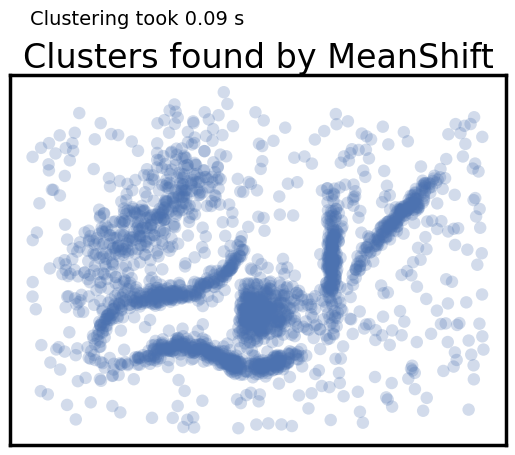

In [ ]:
# Mean shift
plot_clusters(data, cluster.MeanShift,(),kwds={ 'bandwidth':0.5, 'bin_seeding':True,
                                               'n_jobs':1, 'max_iter':300, 'cluster_all':True})

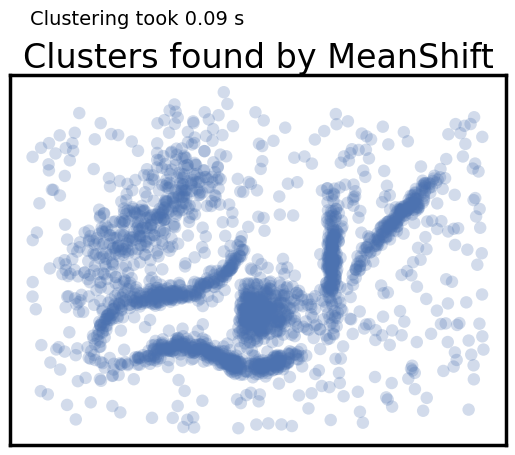

In [ ]:
# Mean shift
plot_clusters(data, cluster.MeanShift,(),kwds={ 'bandwidth':0.9, 'bin_seeding':True,
                                               'n_jobs':1, 'max_iter':300, 'cluster_all':True})

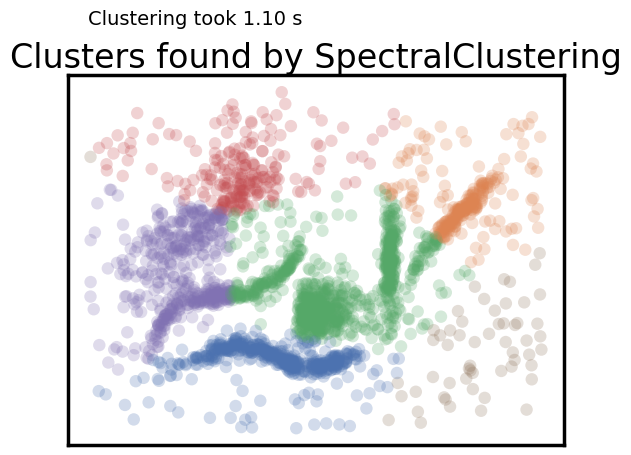

In [ ]:
#Spectral Clustering
plot_clusters(data, cluster.SpectralClustering, (), kwds= {'n_clusters':6, 'eigen_solver':None, 'n_components':None,
                                                           'random_state':42,'gamma':1.0, 'affinity':'rbf',
                                                           'eigen_tol':'auto'})
                                                           

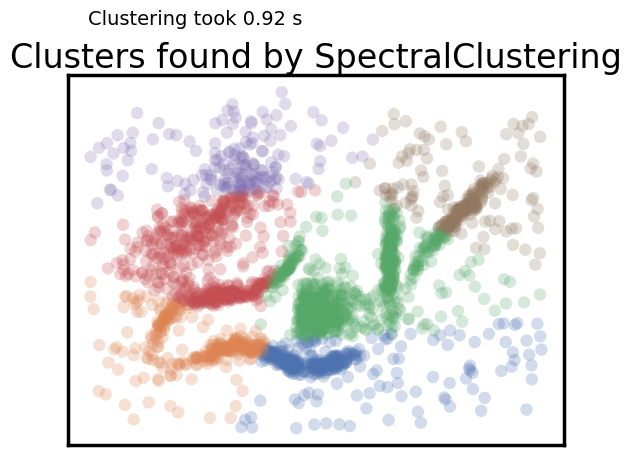

In [ ]:
#Spectral Clustering
plot_clusters(data, cluster.SpectralClustering, (), kwds= {'n_clusters':6, 'eigen_solver':None, 'n_components':5,
                                                           'random_state':42,'gamma':1.0, 'affinity':'rbf',
                                                           'eigen_tol':'auto'})
                                                           

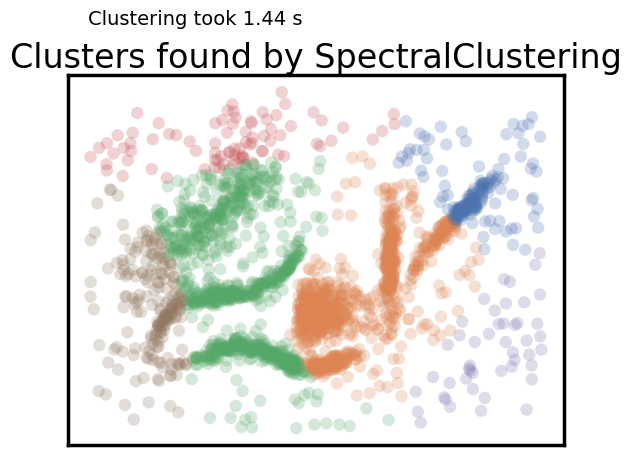

In [ ]:
#Spectral Clustering
plot_clusters(data, cluster.SpectralClustering, (), kwds= {'n_clusters':6, 'eigen_solver':None, 'n_components':10,
                                                           'random_state':42,'gamma':1.0, 'affinity':'rbf',
                                                           'eigen_tol':'auto'})
                                                           

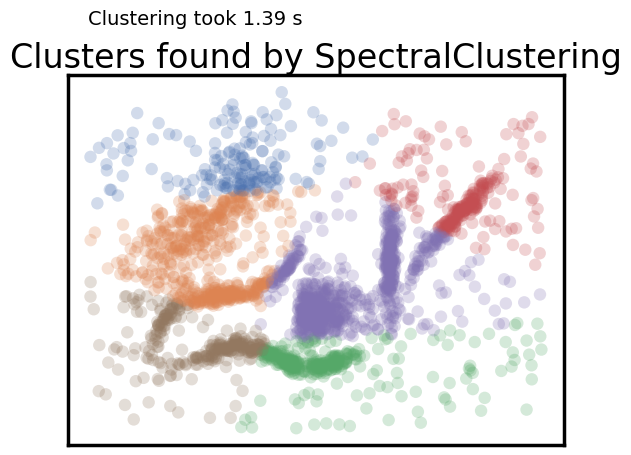

In [ ]:
#Spectral Clustering
plot_clusters(data, cluster.SpectralClustering, (), kwds= {'n_clusters':6, 'eigen_solver':'lobpcg', 'n_components':5,
                                                           'random_state':42, 'gamma':1.0, 'affinity':'rbf', 'eigen_tol':None})

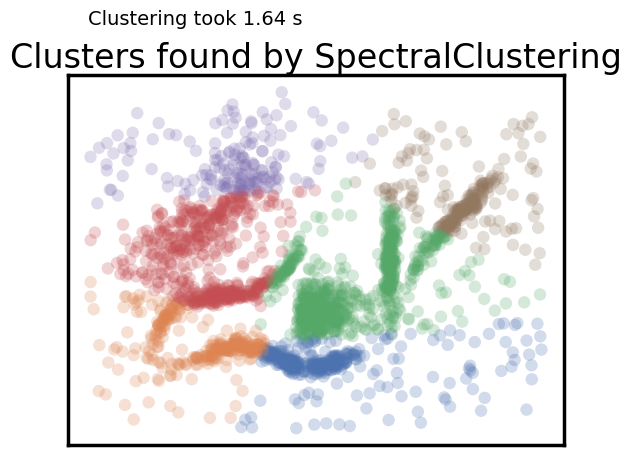

In [7]:
#Spectral Clustering
plot_clusters(data, cluster.SpectralClustering, (), kwds= {'n_clusters':6, 'eigen_solver':'arpack', 'n_components':5,
                                                           'random_state':42,'gamma':1.0, 'affinity':'rbf',
                                                           'eigen_tol':0.0})
                                                           

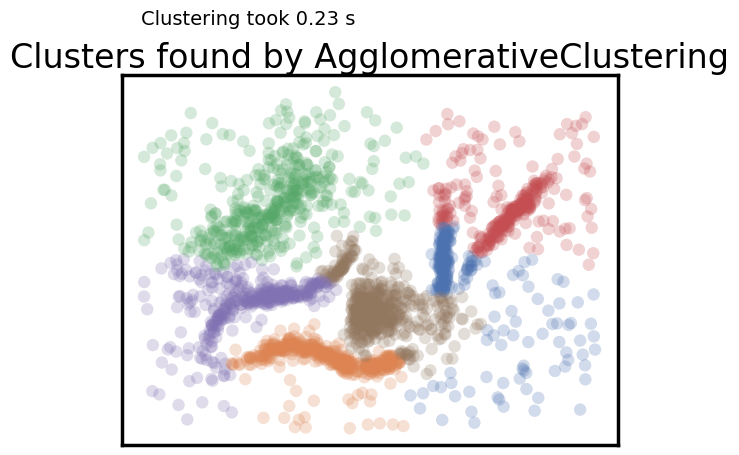

In [ ]:
#Agglomerative Clustering
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6,'linkage':'ward'})

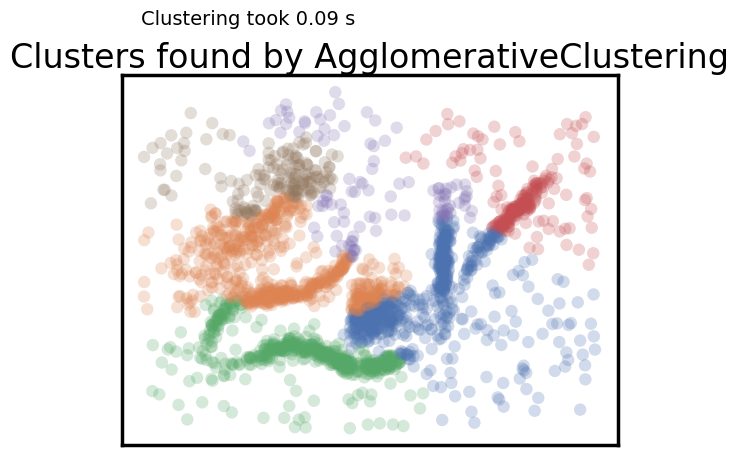

In [ ]:
#Agglomerative Clustering
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6,'linkage':'complete'})

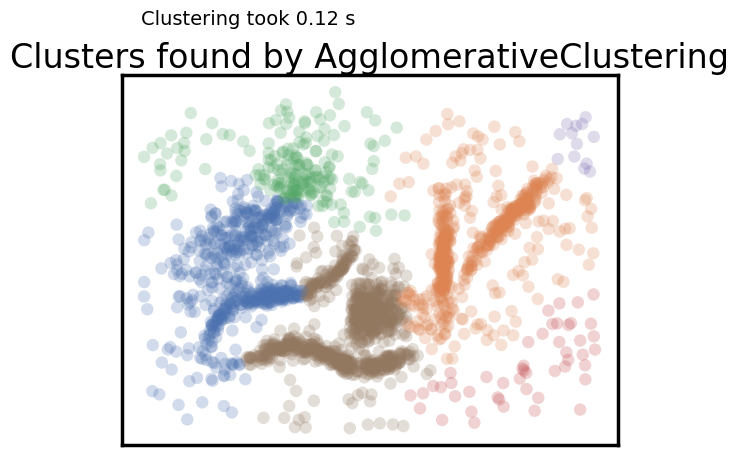

In [ ]:
#Agglomerative Clustering
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6,'linkage':'average'})

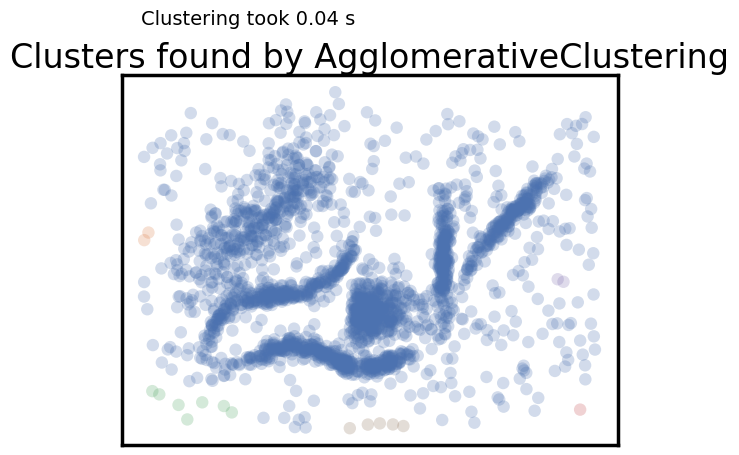

In [ ]:
#Agglomerative Clustering
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6,'linkage':'single'})

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 30.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541475 sha256=6620bbe39eb9be790b22ddbf56ea000b2a6c346416ddd8d1fd89792d74179433
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan


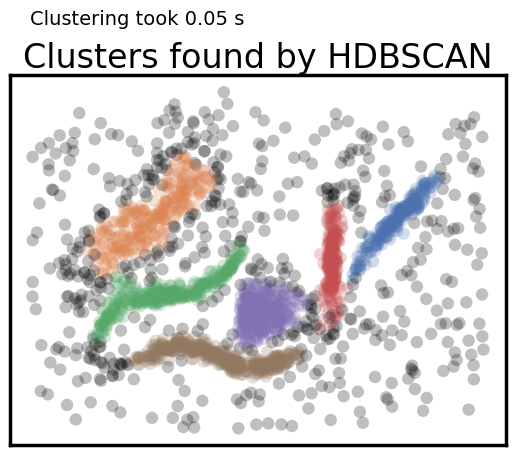

In [ ]:
import hdbscan
plot_clusters(data, hdbscan.HDBSCAN,(),{'min_cluster_size':15, 'min_samples':None, 'cluster_selection_epsilon':0.0,
                                         'alpha':1.0,'cluster_selection_method':'eom'})
                                        

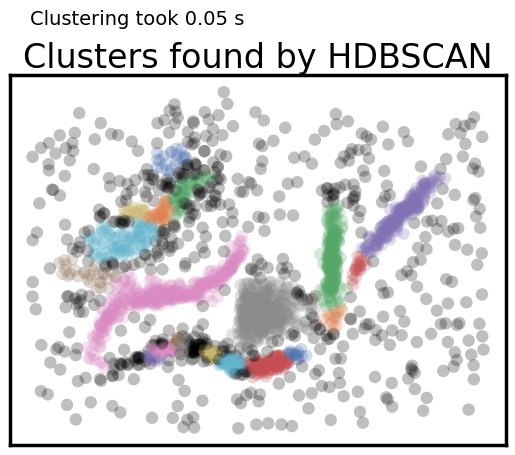

In [ ]:

plot_clusters(data, hdbscan.HDBSCAN,(),{'min_cluster_size':15, 'min_samples':1, 'cluster_selection_epsilon':0.0,
                                         'alpha':1.0,'cluster_selection_method':'eom'})
                                        

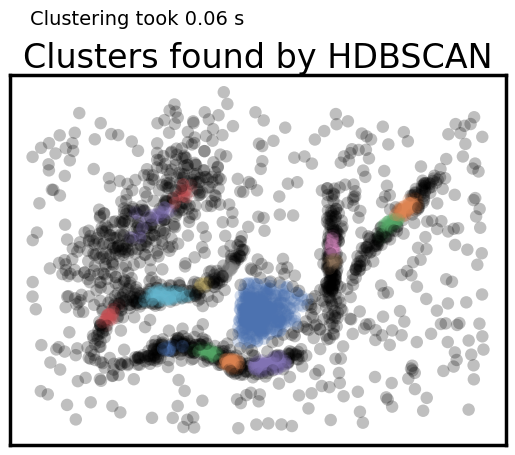

In [ ]:

plot_clusters(data, hdbscan.HDBSCAN,(),{'min_cluster_size':15, 'min_samples':None, 'cluster_selection_epsilon':0.0,
                                         'alpha':1.0,'cluster_selection_method':'leaf'})
                                        

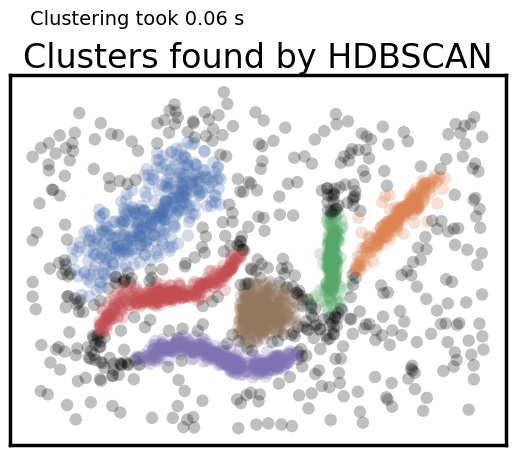

In [ ]:
#HDBSCAN
plot_clusters(data, hdbscan.HDBSCAN,(),{'min_cluster_size':25, 'min_samples':None, 'cluster_selection_epsilon':0.0,
                                        'alpha':1.0, 'cluster_selection_method':'eom'})

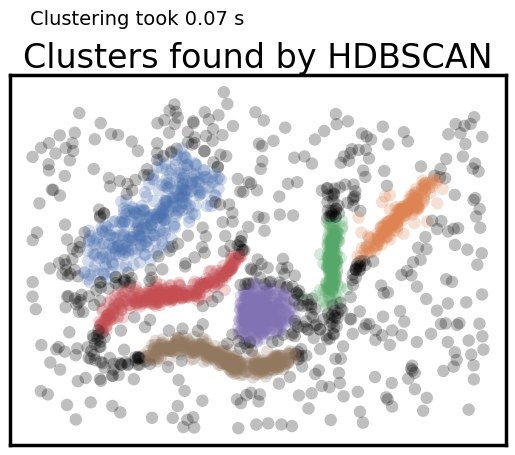

In [ ]:
import hdbscan
plot_clusters(data, hdbscan.HDBSCAN,(),{'min_cluster_size':30, 'min_samples':None, 'cluster_selection_epsilon':0.0,
                                         'alpha':1.0,'cluster_selection_method':'eom'})
                                        